**Goal:** This notebook is to explore the dynamically learnt character-level embeddings from our authorship attribution model.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
plt.style.use('fivethirtyeight')

%matplotlib inline

In [48]:
char_embeddings = np.load('../outputs/10_user_Nov11_embeddings.npy')

with open('../outputs/Nov11_char_dic.json', 'r') as fp:
    charToIndex = json.load(fp)
    
vocab_size = len(charToIndex)
    
indexToChar = {v: k for k, v in charToIndex.items()}

## PCA projection

Perform PCA on the learnt character embeddings.

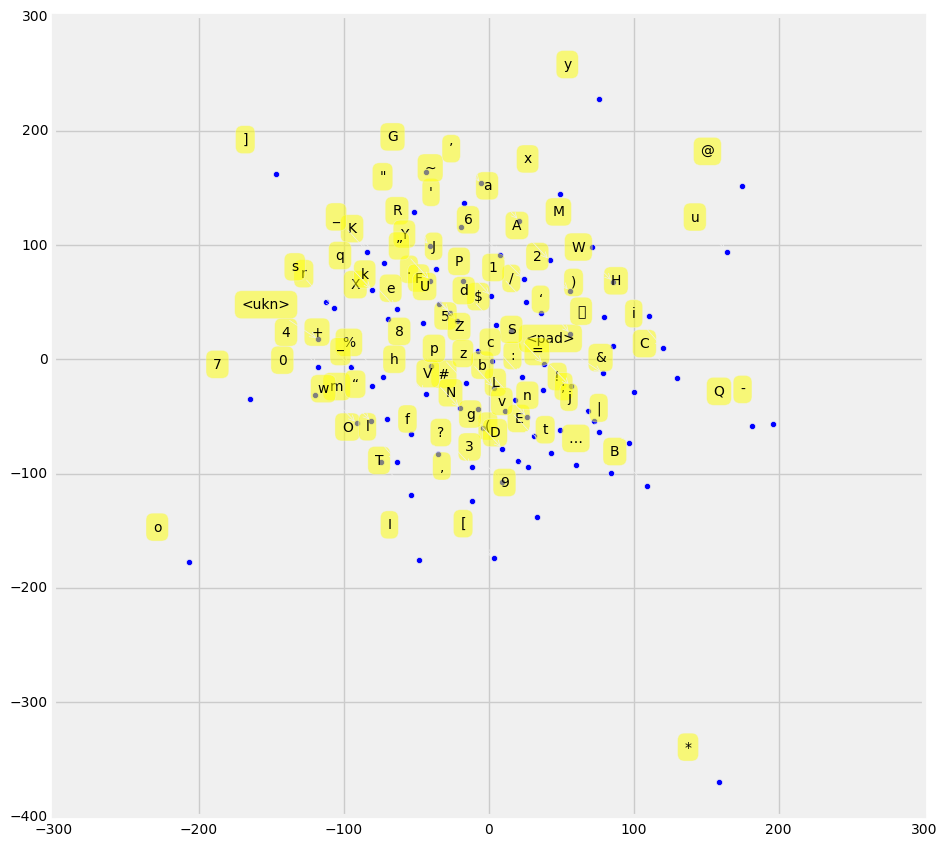

In [49]:
pca = TSNE(n_components=2, perplexity=1)

two_d_embs = pca.fit_transform(char_embeddings)

labels = [indexToChar[i] for i in range(vocab_size)]

plt.figure(figsize=(10, 10))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    two_d_embs[:, 0], two_d_embs[:, 1], marker='o')

for label, x, y in zip(labels, two_d_embs[:, 0], two_d_embs[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))